# Model Training 

### 1.1 Importing all the required Packages and Data

#### Importing Numpy, Pandas, Matplitlib, Seaborn and Warning Library.

In [1]:
# Basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings 

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head() 


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Preparing X and Y variables

In [4]:
X = df.drop(columns=['math score'],axis=1)
y = df['math score']
X


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [5]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features)
    ]
)




In [6]:
X = preprocessor.fit_transform(X)


In [7]:
X.shape

(1000, 19)

In [8]:
# seperate Dataset in train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluste Function to give all metrics after model Training

In [9]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true,predicted)
    return mae, rmse, r2_square

In [10]:
models = {
    'Linear Regression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    'K-Neighbors Regression' : KNeighborsRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'XGBRegressor' : XGBRegressor(),
    'AdaBoost Regressor' : AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train the model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluste train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('model performance for Training set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R2 Error: {:.4f}'.format(model_train_r2))

    print('---------------------------------')

    print('model performance for testing set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R2 Error: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')



Linear Regression
model performance for Training set
- Root Mean Squared Error: 5.3358
- Mean Absolute Error: 4.2872
- R2 Error: 0.8737
---------------------------------
model performance for testing set
- Root Mean Squared Error: 5.3573
- Mean Absolute Error: 4.1803
- R2 Error: 0.8821


Lasso
model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Error: 0.8071
---------------------------------
model performance for testing set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Error: 0.8253


Ridge
model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Error: 0.8743
---------------------------------
model performance for testing set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Error: 0.8806


K-Neighbors Regression
model performance for Training set
- Root Mean Squared Error: 5.7066
- Mean Absolute Error: 4.5137
- R2 Error: 0.8556
----------------

In [11]:
list(zip(model_list, r2_list))

[('Linear Regression', 0.8820558858312129),
 ('Lasso', 0.8253197323627852),
 ('Ridge', 0.8805931485028737),
 ('K-Neighbors Regression', 0.7838129945787431),
 ('Decision Tree', 0.769456855144934),
 ('Random Forest Regressor', 0.8525530894796791),
 ('XGBRegressor', 0.8215894515233413),
 ('AdaBoost Regressor', 0.8525265378137339)]

### Results

In [49]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model Name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.882056
2,Ridge,0.880593
7,AdaBoost Regressor,0.852320
5,Random Forest Regressor,0.852116
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regression,0.783813
4,Decision Tree,0.749135


## Linear Regression 

In [50]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.21


## Plot y_pred and y_test

Text(0, 0.5, 'Predicted')

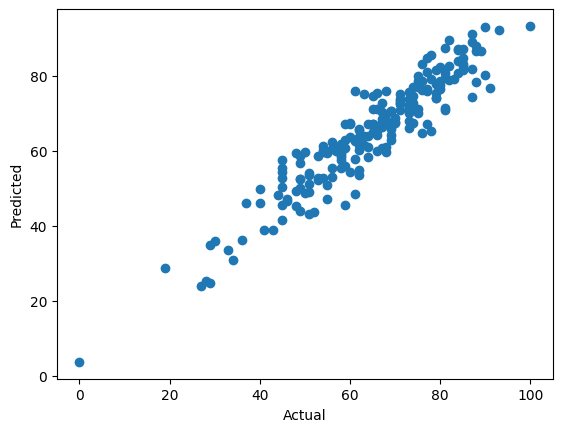

In [51]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score', ylabel='math score'>

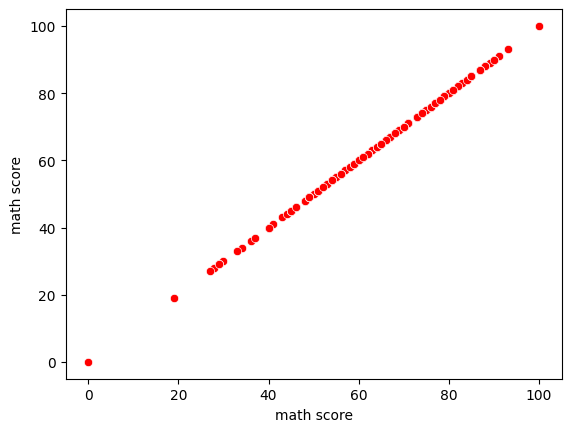

In [15]:

sns.scatterplot(x=y_test,y=y_test,color='red')

In [53]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})

In [54]:
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.5625,14.4375
737,53,58.5000,-5.5000
740,80,77.4375,2.5625
660,74,76.9375,-2.9375
411,84,87.0625,-3.0625
...,...,...,...
408,52,43.6875,8.3125
332,62,61.5000,0.5000
208,74,67.4375,6.5625
613,65,67.1875,-2.1875


manisurya
